# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

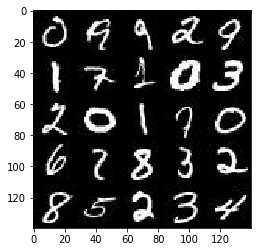

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

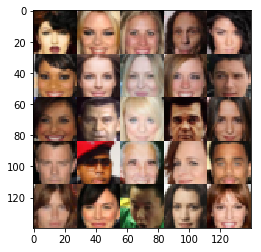

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,(None,image_width, image_height, 
                                             image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,(None,z_dim),name='z_inputs')
    lr = tf.placeholder(tf.float32,name='lr')

    return real_inputs, z_inputs, lr



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits 




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim,alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss
    
   
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    if (data_image_mode == "L"):
        out_channel_dim=1
    else:
        out_channel_dim=3

    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    lr = learning_rate
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    print_every=10
    show_every=100
    samples, losses = [], []
    steps=0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z=np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f} ...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    #show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                    
        # show images at end of training
        #show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
        show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.7497 ... Generator Loss: 0.2319
Epoch 1/2... Discriminator Loss: 13.1894 ... Generator Loss: 18.0297
Epoch 1/2... Discriminator Loss: 4.8933 ... Generator Loss: 7.0033
Epoch 1/2... Discriminator Loss: 4.1813 ... Generator Loss: 4.3510
Epoch 1/2... Discriminator Loss: 3.5554 ... Generator Loss: 3.7318
Epoch 1/2... Discriminator Loss: 3.0897 ... Generator Loss: 3.5666
Epoch 1/2... Discriminator Loss: 3.1349 ... Generator Loss: 3.2423
Epoch 1/2... Discriminator Loss: 2.6740 ... Generator Loss: 2.9314
Epoch 1/2... Discriminator Loss: 2.6105 ... Generator Loss: 2.6675
Epoch 1/2... Discriminator Loss: 1.9135 ... Generator Loss: 1.8898


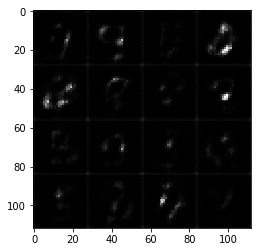

Epoch 1/2... Discriminator Loss: 2.2119 ... Generator Loss: 2.4306
Epoch 1/2... Discriminator Loss: 2.2030 ... Generator Loss: 2.3707
Epoch 1/2... Discriminator Loss: 1.6947 ... Generator Loss: 1.8663
Epoch 1/2... Discriminator Loss: 1.3723 ... Generator Loss: 1.0000
Epoch 1/2... Discriminator Loss: 1.9739 ... Generator Loss: 0.3142
Epoch 1/2... Discriminator Loss: 1.8933 ... Generator Loss: 0.2784
Epoch 1/2... Discriminator Loss: 1.8380 ... Generator Loss: 0.3212
Epoch 1/2... Discriminator Loss: 1.2889 ... Generator Loss: 0.5622
Epoch 1/2... Discriminator Loss: 1.2124 ... Generator Loss: 0.9129
Epoch 1/2... Discriminator Loss: 1.6643 ... Generator Loss: 0.4143


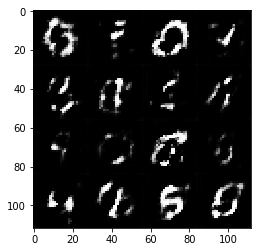

Epoch 1/2... Discriminator Loss: 1.6234 ... Generator Loss: 0.5492
Epoch 1/2... Discriminator Loss: 3.3817 ... Generator Loss: 3.9240
Epoch 1/2... Discriminator Loss: 2.3127 ... Generator Loss: 3.4898
Epoch 1/2... Discriminator Loss: 1.4469 ... Generator Loss: 1.8886
Epoch 1/2... Discriminator Loss: 1.4885 ... Generator Loss: 1.7972
Epoch 1/2... Discriminator Loss: 1.6755 ... Generator Loss: 1.9283
Epoch 1/2... Discriminator Loss: 1.1680 ... Generator Loss: 2.2619
Epoch 1/2... Discriminator Loss: 1.8460 ... Generator Loss: 1.9283
Epoch 1/2... Discriminator Loss: 1.1287 ... Generator Loss: 2.0401
Epoch 1/2... Discriminator Loss: 1.9154 ... Generator Loss: 0.2970


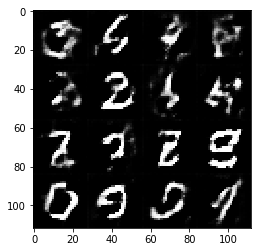

Epoch 1/2... Discriminator Loss: 1.6284 ... Generator Loss: 0.4761
Epoch 1/2... Discriminator Loss: 2.8499 ... Generator Loss: 4.9329
Epoch 1/2... Discriminator Loss: 1.9188 ... Generator Loss: 0.2738
Epoch 1/2... Discriminator Loss: 1.8775 ... Generator Loss: 0.2724
Epoch 1/2... Discriminator Loss: 1.3095 ... Generator Loss: 0.6430
Epoch 1/2... Discriminator Loss: 1.4464 ... Generator Loss: 1.6750
Epoch 1/2... Discriminator Loss: 1.5753 ... Generator Loss: 1.6524
Epoch 1/2... Discriminator Loss: 1.4611 ... Generator Loss: 1.3122
Epoch 1/2... Discriminator Loss: 1.7848 ... Generator Loss: 2.5661
Epoch 1/2... Discriminator Loss: 1.7065 ... Generator Loss: 1.4036


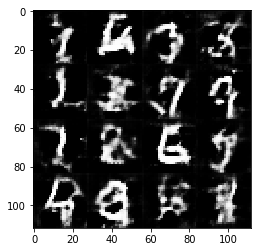

Epoch 1/2... Discriminator Loss: 1.5558 ... Generator Loss: 2.6439
Epoch 1/2... Discriminator Loss: 1.6194 ... Generator Loss: 0.3699
Epoch 1/2... Discriminator Loss: 1.3806 ... Generator Loss: 0.5770
Epoch 1/2... Discriminator Loss: 1.8705 ... Generator Loss: 0.3182
Epoch 1/2... Discriminator Loss: 1.5613 ... Generator Loss: 0.4871
Epoch 1/2... Discriminator Loss: 1.9030 ... Generator Loss: 0.2770
Epoch 1/2... Discriminator Loss: 1.6705 ... Generator Loss: 0.6042
Epoch 1/2... Discriminator Loss: 1.6137 ... Generator Loss: 0.3805
Epoch 1/2... Discriminator Loss: 1.4238 ... Generator Loss: 0.6129
Epoch 1/2... Discriminator Loss: 1.5889 ... Generator Loss: 0.5213


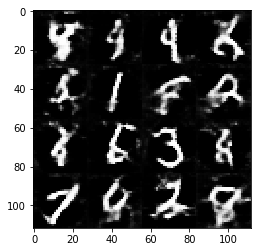

Epoch 1/2... Discriminator Loss: 1.5474 ... Generator Loss: 2.0436
Epoch 1/2... Discriminator Loss: 1.4557 ... Generator Loss: 1.8365
Epoch 1/2... Discriminator Loss: 1.3042 ... Generator Loss: 1.3150
Epoch 1/2... Discriminator Loss: 1.2781 ... Generator Loss: 1.3967
Epoch 1/2... Discriminator Loss: 1.4228 ... Generator Loss: 1.2270
Epoch 1/2... Discriminator Loss: 1.4385 ... Generator Loss: 1.6760
Epoch 1/2... Discriminator Loss: 1.5337 ... Generator Loss: 1.7875
Epoch 1/2... Discriminator Loss: 1.4159 ... Generator Loss: 1.4356
Epoch 1/2... Discriminator Loss: 1.4009 ... Generator Loss: 1.1597
Epoch 1/2... Discriminator Loss: 1.5335 ... Generator Loss: 0.4856


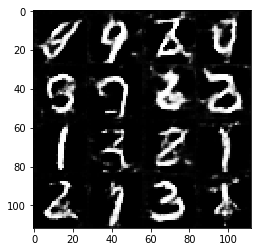

Epoch 1/2... Discriminator Loss: 1.7342 ... Generator Loss: 0.3374
Epoch 1/2... Discriminator Loss: 1.3604 ... Generator Loss: 0.5675
Epoch 1/2... Discriminator Loss: 1.3799 ... Generator Loss: 0.6061
Epoch 1/2... Discriminator Loss: 1.4963 ... Generator Loss: 0.8426
Epoch 1/2... Discriminator Loss: 1.5400 ... Generator Loss: 0.4399
Epoch 1/2... Discriminator Loss: 1.3998 ... Generator Loss: 0.5337
Epoch 1/2... Discriminator Loss: 1.1775 ... Generator Loss: 0.7796
Epoch 1/2... Discriminator Loss: 2.1000 ... Generator Loss: 0.2144
Epoch 1/2... Discriminator Loss: 1.2582 ... Generator Loss: 0.6707
Epoch 1/2... Discriminator Loss: 1.5092 ... Generator Loss: 0.5078


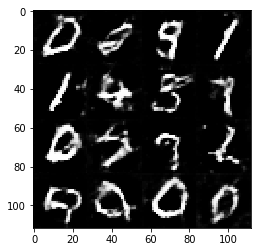

Epoch 1/2... Discriminator Loss: 1.5775 ... Generator Loss: 0.4023
Epoch 1/2... Discriminator Loss: 1.3678 ... Generator Loss: 0.5696
Epoch 1/2... Discriminator Loss: 1.8869 ... Generator Loss: 0.2983
Epoch 1/2... Discriminator Loss: 1.3667 ... Generator Loss: 1.2923
Epoch 1/2... Discriminator Loss: 1.1887 ... Generator Loss: 1.2715
Epoch 1/2... Discriminator Loss: 1.2483 ... Generator Loss: 0.9324
Epoch 1/2... Discriminator Loss: 1.6918 ... Generator Loss: 1.9490
Epoch 1/2... Discriminator Loss: 1.3230 ... Generator Loss: 0.8444
Epoch 1/2... Discriminator Loss: 1.6172 ... Generator Loss: 0.4027
Epoch 1/2... Discriminator Loss: 1.8277 ... Generator Loss: 0.2954


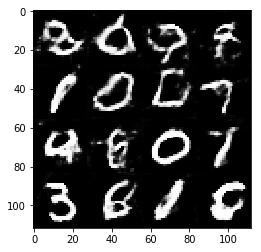

Epoch 1/2... Discriminator Loss: 1.3240 ... Generator Loss: 0.5895
Epoch 1/2... Discriminator Loss: 1.2435 ... Generator Loss: 0.7977
Epoch 1/2... Discriminator Loss: 1.5718 ... Generator Loss: 0.4508
Epoch 1/2... Discriminator Loss: 1.6165 ... Generator Loss: 0.4216
Epoch 1/2... Discriminator Loss: 1.6081 ... Generator Loss: 0.5339
Epoch 1/2... Discriminator Loss: 1.6741 ... Generator Loss: 0.3750
Epoch 1/2... Discriminator Loss: 1.6257 ... Generator Loss: 0.3680
Epoch 1/2... Discriminator Loss: 1.1930 ... Generator Loss: 0.9319
Epoch 1/2... Discriminator Loss: 1.4437 ... Generator Loss: 1.4025
Epoch 1/2... Discriminator Loss: 1.3285 ... Generator Loss: 0.6505


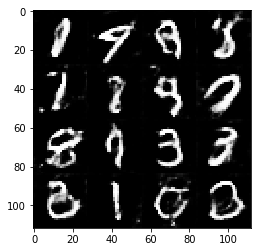

Epoch 1/2... Discriminator Loss: 1.6231 ... Generator Loss: 0.4016
Epoch 1/2... Discriminator Loss: 1.1857 ... Generator Loss: 0.8159
Epoch 1/2... Discriminator Loss: 1.3871 ... Generator Loss: 0.5678
Epoch 2/2... Discriminator Loss: 1.5515 ... Generator Loss: 0.4329
Epoch 2/2... Discriminator Loss: 1.5222 ... Generator Loss: 0.4721
Epoch 2/2... Discriminator Loss: 1.8165 ... Generator Loss: 0.3543
Epoch 2/2... Discriminator Loss: 1.3785 ... Generator Loss: 0.6161
Epoch 2/2... Discriminator Loss: 1.4455 ... Generator Loss: 0.5614
Epoch 2/2... Discriminator Loss: 1.4829 ... Generator Loss: 0.5095
Epoch 2/2... Discriminator Loss: 1.4612 ... Generator Loss: 0.5419


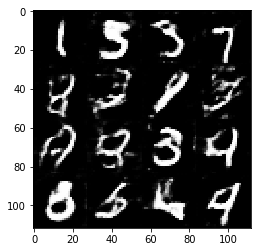

Epoch 2/2... Discriminator Loss: 1.3274 ... Generator Loss: 0.8364
Epoch 2/2... Discriminator Loss: 1.2695 ... Generator Loss: 0.7078
Epoch 2/2... Discriminator Loss: 1.9048 ... Generator Loss: 0.2796
Epoch 2/2... Discriminator Loss: 1.3183 ... Generator Loss: 0.7518
Epoch 2/2... Discriminator Loss: 1.9231 ... Generator Loss: 0.2762
Epoch 2/2... Discriminator Loss: 1.2952 ... Generator Loss: 0.6547
Epoch 2/2... Discriminator Loss: 1.4985 ... Generator Loss: 0.5980
Epoch 2/2... Discriminator Loss: 1.4116 ... Generator Loss: 1.7646
Epoch 2/2... Discriminator Loss: 1.3279 ... Generator Loss: 0.8041
Epoch 2/2... Discriminator Loss: 1.6172 ... Generator Loss: 0.4427


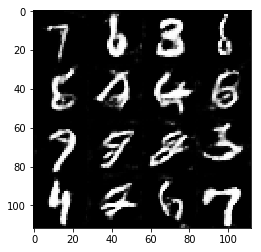

Epoch 2/2... Discriminator Loss: 1.1831 ... Generator Loss: 0.8927
Epoch 2/2... Discriminator Loss: 1.2882 ... Generator Loss: 1.0484
Epoch 2/2... Discriminator Loss: 1.2865 ... Generator Loss: 1.5724
Epoch 2/2... Discriminator Loss: 1.3141 ... Generator Loss: 1.1575
Epoch 2/2... Discriminator Loss: 1.0143 ... Generator Loss: 1.2210
Epoch 2/2... Discriminator Loss: 1.6341 ... Generator Loss: 1.5456
Epoch 2/2... Discriminator Loss: 1.1678 ... Generator Loss: 1.2454
Epoch 2/2... Discriminator Loss: 1.5772 ... Generator Loss: 0.4164
Epoch 2/2... Discriminator Loss: 1.5010 ... Generator Loss: 0.4919
Epoch 2/2... Discriminator Loss: 1.2568 ... Generator Loss: 0.7970


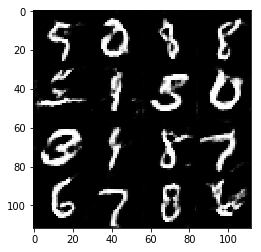

Epoch 2/2... Discriminator Loss: 1.4791 ... Generator Loss: 0.4651
Epoch 2/2... Discriminator Loss: 1.8417 ... Generator Loss: 2.1956
Epoch 2/2... Discriminator Loss: 1.2577 ... Generator Loss: 1.0356
Epoch 2/2... Discriminator Loss: 1.1429 ... Generator Loss: 1.1064
Epoch 2/2... Discriminator Loss: 1.2140 ... Generator Loss: 0.9626
Epoch 2/2... Discriminator Loss: 1.3508 ... Generator Loss: 0.6088
Epoch 2/2... Discriminator Loss: 1.0884 ... Generator Loss: 1.4580
Epoch 2/2... Discriminator Loss: 1.5589 ... Generator Loss: 2.3021
Epoch 2/2... Discriminator Loss: 1.0890 ... Generator Loss: 1.3396
Epoch 2/2... Discriminator Loss: 1.0923 ... Generator Loss: 1.1448


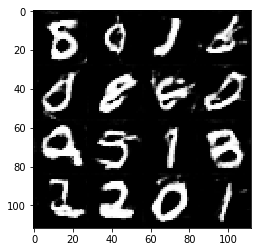

Epoch 2/2... Discriminator Loss: 1.1524 ... Generator Loss: 1.6293
Epoch 2/2... Discriminator Loss: 1.1431 ... Generator Loss: 1.1232
Epoch 2/2... Discriminator Loss: 1.8059 ... Generator Loss: 0.3583
Epoch 2/2... Discriminator Loss: 1.4731 ... Generator Loss: 0.5238
Epoch 2/2... Discriminator Loss: 1.4238 ... Generator Loss: 0.5100
Epoch 2/2... Discriminator Loss: 1.3775 ... Generator Loss: 1.8418
Epoch 2/2... Discriminator Loss: 1.2116 ... Generator Loss: 0.8656
Epoch 2/2... Discriminator Loss: 1.1211 ... Generator Loss: 1.0253
Epoch 2/2... Discriminator Loss: 1.4663 ... Generator Loss: 0.5060
Epoch 2/2... Discriminator Loss: 1.3110 ... Generator Loss: 0.5725


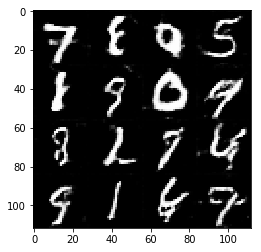

Epoch 2/2... Discriminator Loss: 1.0615 ... Generator Loss: 1.2349
Epoch 2/2... Discriminator Loss: 1.4630 ... Generator Loss: 1.2987
Epoch 2/2... Discriminator Loss: 1.0703 ... Generator Loss: 1.2330
Epoch 2/2... Discriminator Loss: 1.3348 ... Generator Loss: 1.6097


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.3695 ... Generator Loss: 0.2245
Epoch 1/1... Discriminator Loss: 1.4795 ... Generator Loss: 0.4927
Epoch 1/1... Discriminator Loss: 0.8222 ... Generator Loss: 1.6653
Epoch 1/1... Discriminator Loss: 2.4372 ... Generator Loss: 0.1816
Epoch 1/1... Discriminator Loss: 2.4663 ... Generator Loss: 6.4178
Epoch 1/1... Discriminator Loss: 2.0946 ... Generator Loss: 0.2525
Epoch 1/1... Discriminator Loss: 1.2105 ... Generator Loss: 3.0543
Epoch 1/1... Discriminator Loss: 1.0395 ... Generator Loss: 3.1889
Epoch 1/1... Discriminator Loss: 0.8570 ... Generator Loss: 1.4457
Epoch 1/1... Discriminator Loss: 1.3178 ... Generator Loss: 6.1292


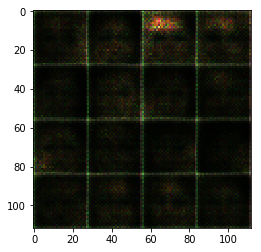

Epoch 1/1... Discriminator Loss: 2.8285 ... Generator Loss: 5.8781
Epoch 1/1... Discriminator Loss: 0.9416 ... Generator Loss: 3.0351
Epoch 1/1... Discriminator Loss: 0.7250 ... Generator Loss: 3.4241
Epoch 1/1... Discriminator Loss: 1.5054 ... Generator Loss: 0.4834
Epoch 1/1... Discriminator Loss: 1.9871 ... Generator Loss: 0.2752
Epoch 1/1... Discriminator Loss: 1.7718 ... Generator Loss: 0.3453
Epoch 1/1... Discriminator Loss: 2.0307 ... Generator Loss: 0.2561
Epoch 1/1... Discriminator Loss: 1.2885 ... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 1.1845 ... Generator Loss: 5.0592
Epoch 1/1... Discriminator Loss: 1.1371 ... Generator Loss: 2.9318


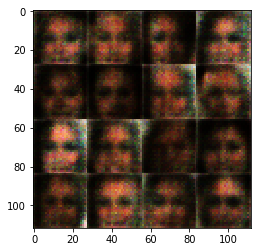

Epoch 1/1... Discriminator Loss: 0.8838 ... Generator Loss: 1.5299
Epoch 1/1... Discriminator Loss: 1.6609 ... Generator Loss: 1.4006
Epoch 1/1... Discriminator Loss: 0.7650 ... Generator Loss: 1.3014
Epoch 1/1... Discriminator Loss: 1.3839 ... Generator Loss: 0.5122
Epoch 1/1... Discriminator Loss: 2.0155 ... Generator Loss: 0.2377
Epoch 1/1... Discriminator Loss: 2.0312 ... Generator Loss: 0.2380
Epoch 1/1... Discriminator Loss: 1.7335 ... Generator Loss: 0.3271
Epoch 1/1... Discriminator Loss: 1.3013 ... Generator Loss: 0.5473
Epoch 1/1... Discriminator Loss: 1.3004 ... Generator Loss: 0.5427
Epoch 1/1... Discriminator Loss: 1.4021 ... Generator Loss: 0.4741


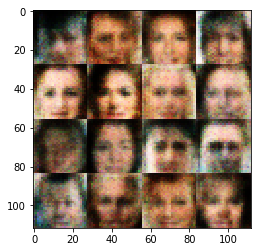

Epoch 1/1... Discriminator Loss: 0.8560 ... Generator Loss: 3.5362
Epoch 1/1... Discriminator Loss: 0.4816 ... Generator Loss: 2.2202
Epoch 1/1... Discriminator Loss: 0.4954 ... Generator Loss: 2.6956
Epoch 1/1... Discriminator Loss: 0.5723 ... Generator Loss: 1.8056
Epoch 1/1... Discriminator Loss: 1.6769 ... Generator Loss: 0.3358
Epoch 1/1... Discriminator Loss: 0.6373 ... Generator Loss: 4.0113
Epoch 1/1... Discriminator Loss: 0.5519 ... Generator Loss: 3.5729
Epoch 1/1... Discriminator Loss: 0.4419 ... Generator Loss: 4.2476
Epoch 1/1... Discriminator Loss: 0.4922 ... Generator Loss: 2.2215
Epoch 1/1... Discriminator Loss: 0.5648 ... Generator Loss: 2.1645


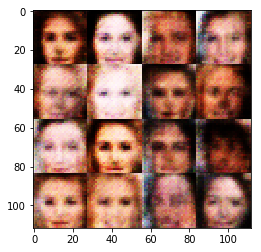

Epoch 1/1... Discriminator Loss: 0.8159 ... Generator Loss: 4.1603
Epoch 1/1... Discriminator Loss: 1.8365 ... Generator Loss: 3.5687
Epoch 1/1... Discriminator Loss: 0.7693 ... Generator Loss: 1.1660
Epoch 1/1... Discriminator Loss: 1.8578 ... Generator Loss: 0.2828
Epoch 1/1... Discriminator Loss: 1.3962 ... Generator Loss: 5.9301
Epoch 1/1... Discriminator Loss: 0.6416 ... Generator Loss: 2.4327
Epoch 1/1... Discriminator Loss: 2.3487 ... Generator Loss: 0.1848
Epoch 1/1... Discriminator Loss: 1.7495 ... Generator Loss: 0.3600
Epoch 1/1... Discriminator Loss: 0.4945 ... Generator Loss: 2.2555
Epoch 1/1... Discriminator Loss: 0.6519 ... Generator Loss: 1.6711


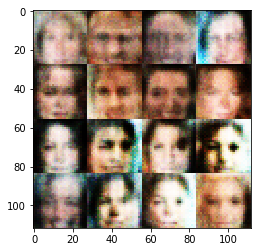

Epoch 1/1... Discriminator Loss: 1.1155 ... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 0.9938 ... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 1.0414 ... Generator Loss: 2.6006
Epoch 1/1... Discriminator Loss: 0.6070 ... Generator Loss: 1.6375
Epoch 1/1... Discriminator Loss: 1.0428 ... Generator Loss: 4.8325
Epoch 1/1... Discriminator Loss: 1.2462 ... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 0.4392 ... Generator Loss: 4.4234
Epoch 1/1... Discriminator Loss: 0.4183 ... Generator Loss: 4.3215
Epoch 1/1... Discriminator Loss: 0.4262 ... Generator Loss: 3.8457
Epoch 1/1... Discriminator Loss: 1.9598 ... Generator Loss: 5.4332


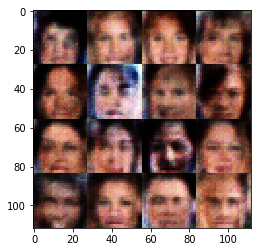

Epoch 1/1... Discriminator Loss: 0.6624 ... Generator Loss: 1.5179
Epoch 1/1... Discriminator Loss: 2.6640 ... Generator Loss: 0.1155
Epoch 1/1... Discriminator Loss: 0.4710 ... Generator Loss: 4.1318
Epoch 1/1... Discriminator Loss: 0.5390 ... Generator Loss: 3.1127
Epoch 1/1... Discriminator Loss: 0.4778 ... Generator Loss: 2.5431
Epoch 1/1... Discriminator Loss: 1.9766 ... Generator Loss: 0.2408
Epoch 1/1... Discriminator Loss: 0.8228 ... Generator Loss: 1.0450
Epoch 1/1... Discriminator Loss: 0.7221 ... Generator Loss: 1.3594
Epoch 1/1... Discriminator Loss: 1.0824 ... Generator Loss: 7.4171
Epoch 1/1... Discriminator Loss: 0.7291 ... Generator Loss: 1.3178


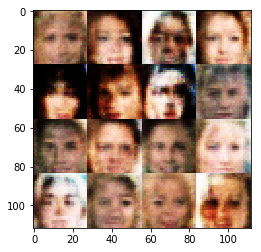

Epoch 1/1... Discriminator Loss: 1.2133 ... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 0.6911 ... Generator Loss: 1.3577
Epoch 1/1... Discriminator Loss: 1.6979 ... Generator Loss: 0.3277
Epoch 1/1... Discriminator Loss: 0.8429 ... Generator Loss: 4.4108
Epoch 1/1... Discriminator Loss: 1.8527 ... Generator Loss: 0.2869
Epoch 1/1... Discriminator Loss: 0.5673 ... Generator Loss: 1.8127
Epoch 1/1... Discriminator Loss: 0.9226 ... Generator Loss: 5.8493
Epoch 1/1... Discriminator Loss: 1.1695 ... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 0.9403 ... Generator Loss: 0.8772
Epoch 1/1... Discriminator Loss: 0.4156 ... Generator Loss: 3.5014


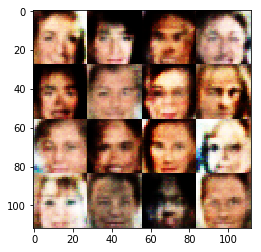

Epoch 1/1... Discriminator Loss: 1.2609 ... Generator Loss: 3.0247
Epoch 1/1... Discriminator Loss: 1.0212 ... Generator Loss: 5.3336
Epoch 1/1... Discriminator Loss: 0.4982 ... Generator Loss: 3.2138
Epoch 1/1... Discriminator Loss: 0.5013 ... Generator Loss: 2.7338
Epoch 1/1... Discriminator Loss: 0.7691 ... Generator Loss: 1.1666
Epoch 1/1... Discriminator Loss: 1.0043 ... Generator Loss: 3.5516
Epoch 1/1... Discriminator Loss: 0.4977 ... Generator Loss: 5.3740
Epoch 1/1... Discriminator Loss: 0.7895 ... Generator Loss: 2.6470
Epoch 1/1... Discriminator Loss: 1.7221 ... Generator Loss: 6.1208
Epoch 1/1... Discriminator Loss: 1.1315 ... Generator Loss: 3.1346


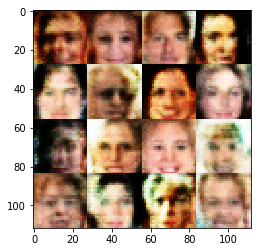

Epoch 1/1... Discriminator Loss: 0.4508 ... Generator Loss: 2.4414
Epoch 1/1... Discriminator Loss: 0.8438 ... Generator Loss: 1.1539
Epoch 1/1... Discriminator Loss: 1.4343 ... Generator Loss: 0.4600
Epoch 1/1... Discriminator Loss: 1.0049 ... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 1.5270 ... Generator Loss: 0.4117
Epoch 1/1... Discriminator Loss: 1.3792 ... Generator Loss: 0.4910
Epoch 1/1... Discriminator Loss: 0.7819 ... Generator Loss: 1.2088
Epoch 1/1... Discriminator Loss: 1.0152 ... Generator Loss: 5.9343
Epoch 1/1... Discriminator Loss: 1.0698 ... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 0.8588 ... Generator Loss: 0.9957


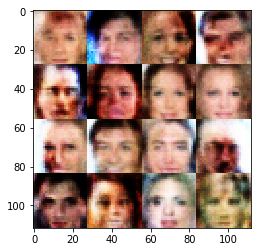

Epoch 1/1... Discriminator Loss: 0.7502 ... Generator Loss: 1.2523
Epoch 1/1... Discriminator Loss: 1.4311 ... Generator Loss: 5.2817
Epoch 1/1... Discriminator Loss: 1.1949 ... Generator Loss: 5.2122
Epoch 1/1... Discriminator Loss: 0.4463 ... Generator Loss: 3.0502
Epoch 1/1... Discriminator Loss: 1.4932 ... Generator Loss: 0.4213
Epoch 1/1... Discriminator Loss: 0.6362 ... Generator Loss: 1.5479
Epoch 1/1... Discriminator Loss: 0.6797 ... Generator Loss: 1.4333
Epoch 1/1... Discriminator Loss: 0.9234 ... Generator Loss: 3.6967
Epoch 1/1... Discriminator Loss: 0.5149 ... Generator Loss: 3.2317
Epoch 1/1... Discriminator Loss: 0.7628 ... Generator Loss: 5.2912


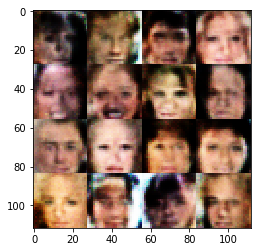

Epoch 1/1... Discriminator Loss: 0.4845 ... Generator Loss: 2.3869
Epoch 1/1... Discriminator Loss: 0.5396 ... Generator Loss: 2.4753
Epoch 1/1... Discriminator Loss: 1.1580 ... Generator Loss: 4.3237
Epoch 1/1... Discriminator Loss: 1.0459 ... Generator Loss: 6.0354
Epoch 1/1... Discriminator Loss: 0.6055 ... Generator Loss: 2.2049
Epoch 1/1... Discriminator Loss: 1.2188 ... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 0.6839 ... Generator Loss: 1.3607
Epoch 1/1... Discriminator Loss: 2.1744 ... Generator Loss: 0.1924
Epoch 1/1... Discriminator Loss: 0.5399 ... Generator Loss: 2.2914
Epoch 1/1... Discriminator Loss: 0.6816 ... Generator Loss: 1.3967


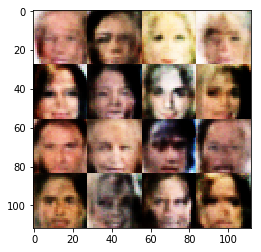

Epoch 1/1... Discriminator Loss: 1.2389 ... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 0.9640 ... Generator Loss: 0.8521
Epoch 1/1... Discriminator Loss: 1.0965 ... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.5560 ... Generator Loss: 0.3976
Epoch 1/1... Discriminator Loss: 0.5024 ... Generator Loss: 3.1462
Epoch 1/1... Discriminator Loss: 0.5197 ... Generator Loss: 2.0509
Epoch 1/1... Discriminator Loss: 1.2228 ... Generator Loss: 4.1286
Epoch 1/1... Discriminator Loss: 0.8047 ... Generator Loss: 3.9984
Epoch 1/1... Discriminator Loss: 0.5611 ... Generator Loss: 2.3035
Epoch 1/1... Discriminator Loss: 0.7069 ... Generator Loss: 1.9018


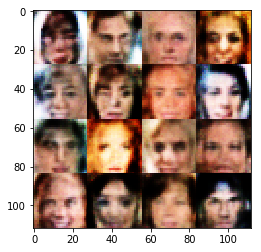

Epoch 1/1... Discriminator Loss: 0.8803 ... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 0.4204 ... Generator Loss: 3.6027
Epoch 1/1... Discriminator Loss: 0.4319 ... Generator Loss: 3.9046
Epoch 1/1... Discriminator Loss: 0.8546 ... Generator Loss: 3.4298
Epoch 1/1... Discriminator Loss: 0.7656 ... Generator Loss: 4.3769
Epoch 1/1... Discriminator Loss: 0.5138 ... Generator Loss: 3.1429
Epoch 1/1... Discriminator Loss: 0.6495 ... Generator Loss: 1.6062
Epoch 1/1... Discriminator Loss: 0.4803 ... Generator Loss: 4.7382
Epoch 1/1... Discriminator Loss: 0.4260 ... Generator Loss: 3.2142
Epoch 1/1... Discriminator Loss: 0.7201 ... Generator Loss: 6.7598


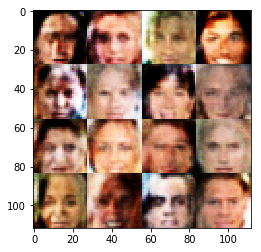

Epoch 1/1... Discriminator Loss: 0.5686 ... Generator Loss: 1.7438
Epoch 1/1... Discriminator Loss: 0.4397 ... Generator Loss: 2.6931
Epoch 1/1... Discriminator Loss: 1.6683 ... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 0.7112 ... Generator Loss: 1.3498
Epoch 1/1... Discriminator Loss: 0.4031 ... Generator Loss: 5.1974
Epoch 1/1... Discriminator Loss: 0.5553 ... Generator Loss: 4.1170
Epoch 1/1... Discriminator Loss: 0.9814 ... Generator Loss: 4.3727
Epoch 1/1... Discriminator Loss: 0.7964 ... Generator Loss: 1.4435
Epoch 1/1... Discriminator Loss: 0.7928 ... Generator Loss: 4.2786
Epoch 1/1... Discriminator Loss: 0.8313 ... Generator Loss: 4.5046


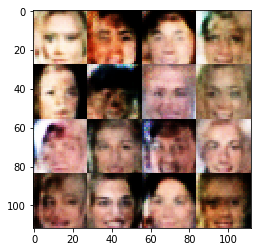

Epoch 1/1... Discriminator Loss: 0.4760 ... Generator Loss: 4.2136
Epoch 1/1... Discriminator Loss: 0.5086 ... Generator Loss: 2.3243
Epoch 1/1... Discriminator Loss: 0.4747 ... Generator Loss: 2.3120
Epoch 1/1... Discriminator Loss: 0.7987 ... Generator Loss: 1.1333
Epoch 1/1... Discriminator Loss: 1.5339 ... Generator Loss: 0.4338
Epoch 1/1... Discriminator Loss: 0.8662 ... Generator Loss: 3.4023
Epoch 1/1... Discriminator Loss: 0.4529 ... Generator Loss: 2.8670
Epoch 1/1... Discriminator Loss: 0.4961 ... Generator Loss: 2.2508
Epoch 1/1... Discriminator Loss: 0.4563 ... Generator Loss: 3.1465
Epoch 1/1... Discriminator Loss: 0.4825 ... Generator Loss: 3.6640


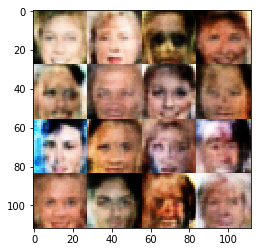

Epoch 1/1... Discriminator Loss: 0.5680 ... Generator Loss: 4.1070
Epoch 1/1... Discriminator Loss: 1.9271 ... Generator Loss: 3.3698
Epoch 1/1... Discriminator Loss: 1.4234 ... Generator Loss: 0.4917
Epoch 1/1... Discriminator Loss: 0.6251 ... Generator Loss: 1.5936
Epoch 1/1... Discriminator Loss: 0.4918 ... Generator Loss: 2.9909
Epoch 1/1... Discriminator Loss: 0.4766 ... Generator Loss: 3.1157
Epoch 1/1... Discriminator Loss: 0.4539 ... Generator Loss: 3.8219
Epoch 1/1... Discriminator Loss: 0.5068 ... Generator Loss: 3.3046
Epoch 1/1... Discriminator Loss: 0.8931 ... Generator Loss: 3.7667
Epoch 1/1... Discriminator Loss: 0.6070 ... Generator Loss: 2.2169


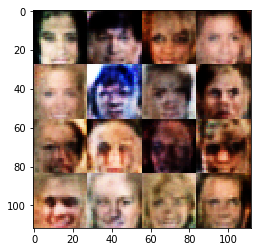

Epoch 1/1... Discriminator Loss: 0.8039 ... Generator Loss: 3.7083
Epoch 1/1... Discriminator Loss: 0.5183 ... Generator Loss: 4.5683
Epoch 1/1... Discriminator Loss: 2.0170 ... Generator Loss: 3.7875
Epoch 1/1... Discriminator Loss: 0.5158 ... Generator Loss: 2.5781
Epoch 1/1... Discriminator Loss: 0.7538 ... Generator Loss: 1.2457
Epoch 1/1... Discriminator Loss: 0.4711 ... Generator Loss: 3.7142
Epoch 1/1... Discriminator Loss: 0.4592 ... Generator Loss: 2.5860
Epoch 1/1... Discriminator Loss: 0.5578 ... Generator Loss: 1.9252
Epoch 1/1... Discriminator Loss: 0.4466 ... Generator Loss: 2.8238
Epoch 1/1... Discriminator Loss: 1.3035 ... Generator Loss: 0.5302


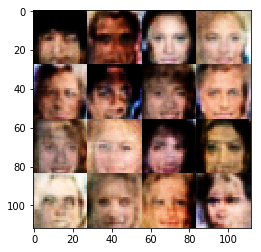

Epoch 1/1... Discriminator Loss: 0.5457 ... Generator Loss: 3.0373
Epoch 1/1... Discriminator Loss: 0.4691 ... Generator Loss: 2.4848
Epoch 1/1... Discriminator Loss: 0.5004 ... Generator Loss: 2.2065
Epoch 1/1... Discriminator Loss: 0.7206 ... Generator Loss: 1.4179
Epoch 1/1... Discriminator Loss: 0.6675 ... Generator Loss: 1.4388
Epoch 1/1... Discriminator Loss: 1.9169 ... Generator Loss: 0.2896
Epoch 1/1... Discriminator Loss: 0.4452 ... Generator Loss: 2.7518
Epoch 1/1... Discriminator Loss: 1.1039 ... Generator Loss: 0.7199
Epoch 1/1... Discriminator Loss: 0.8194 ... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 0.6842 ... Generator Loss: 2.3906


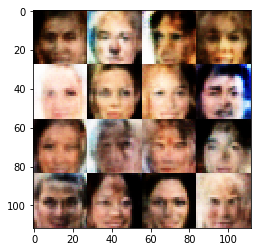

Epoch 1/1... Discriminator Loss: 0.6880 ... Generator Loss: 1.3478
Epoch 1/1... Discriminator Loss: 0.4503 ... Generator Loss: 2.9146
Epoch 1/1... Discriminator Loss: 0.6125 ... Generator Loss: 1.6782
Epoch 1/1... Discriminator Loss: 1.3046 ... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 0.4767 ... Generator Loss: 2.5663
Epoch 1/1... Discriminator Loss: 0.4597 ... Generator Loss: 3.0980
Epoch 1/1... Discriminator Loss: 0.6348 ... Generator Loss: 1.7721
Epoch 1/1... Discriminator Loss: 0.5281 ... Generator Loss: 4.5896
Epoch 1/1... Discriminator Loss: 0.6448 ... Generator Loss: 1.5893
Epoch 1/1... Discriminator Loss: 0.5244 ... Generator Loss: 3.9852


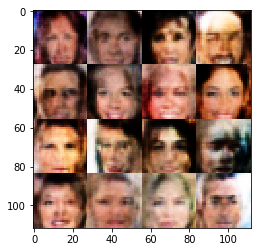

Epoch 1/1... Discriminator Loss: 0.4723 ... Generator Loss: 2.6387
Epoch 1/1... Discriminator Loss: 0.5795 ... Generator Loss: 1.7603
Epoch 1/1... Discriminator Loss: 0.4058 ... Generator Loss: 3.1583
Epoch 1/1... Discriminator Loss: 0.4792 ... Generator Loss: 2.6885
Epoch 1/1... Discriminator Loss: 1.0776 ... Generator Loss: 3.1685
Epoch 1/1... Discriminator Loss: 0.7336 ... Generator Loss: 3.1616
Epoch 1/1... Discriminator Loss: 0.5259 ... Generator Loss: 2.0812
Epoch 1/1... Discriminator Loss: 0.4831 ... Generator Loss: 2.4054
Epoch 1/1... Discriminator Loss: 0.4958 ... Generator Loss: 2.7187
Epoch 1/1... Discriminator Loss: 0.4493 ... Generator Loss: 4.7074


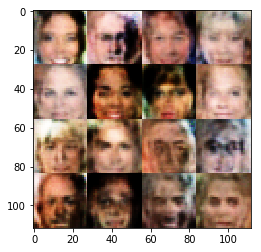

Epoch 1/1... Discriminator Loss: 0.5669 ... Generator Loss: 5.6041
Epoch 1/1... Discriminator Loss: 0.3736 ... Generator Loss: 4.0918
Epoch 1/1... Discriminator Loss: 0.4189 ... Generator Loss: 7.2547
Epoch 1/1... Discriminator Loss: 0.5232 ... Generator Loss: 2.8503
Epoch 1/1... Discriminator Loss: 0.3797 ... Generator Loss: 5.0600
Epoch 1/1... Discriminator Loss: 0.7467 ... Generator Loss: 1.7855
Epoch 1/1... Discriminator Loss: 0.4448 ... Generator Loss: 3.1648
Epoch 1/1... Discriminator Loss: 0.7395 ... Generator Loss: 1.3422
Epoch 1/1... Discriminator Loss: 0.3829 ... Generator Loss: 3.7857
Epoch 1/1... Discriminator Loss: 0.5276 ... Generator Loss: 3.1204


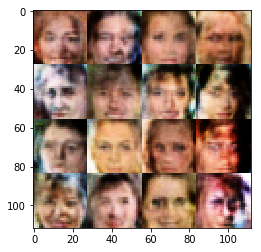

Epoch 1/1... Discriminator Loss: 0.5124 ... Generator Loss: 2.0694
Epoch 1/1... Discriminator Loss: 0.3716 ... Generator Loss: 5.8687
Epoch 1/1... Discriminator Loss: 0.5129 ... Generator Loss: 2.1261
Epoch 1/1... Discriminator Loss: 0.3931 ... Generator Loss: 3.3116
Epoch 1/1... Discriminator Loss: 0.4168 ... Generator Loss: 3.7967
Epoch 1/1... Discriminator Loss: 0.4680 ... Generator Loss: 4.4881
Epoch 1/1... Discriminator Loss: 0.4979 ... Generator Loss: 4.6401
Epoch 1/1... Discriminator Loss: 0.5521 ... Generator Loss: 1.8953
Epoch 1/1... Discriminator Loss: 0.3969 ... Generator Loss: 3.8609
Epoch 1/1... Discriminator Loss: 0.5119 ... Generator Loss: 2.6282


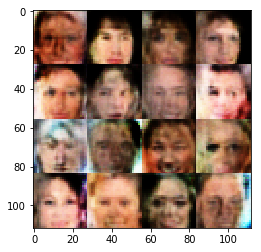

Epoch 1/1... Discriminator Loss: 0.4465 ... Generator Loss: 5.6863
Epoch 1/1... Discriminator Loss: 0.4809 ... Generator Loss: 4.0013
Epoch 1/1... Discriminator Loss: 0.5521 ... Generator Loss: 2.0317
Epoch 1/1... Discriminator Loss: 0.4128 ... Generator Loss: 4.8744
Epoch 1/1... Discriminator Loss: 0.4234 ... Generator Loss: 3.1049
Epoch 1/1... Discriminator Loss: 1.6120 ... Generator Loss: 5.4716
Epoch 1/1... Discriminator Loss: 0.3876 ... Generator Loss: 3.6784
Epoch 1/1... Discriminator Loss: 0.7868 ... Generator Loss: 5.1170
Epoch 1/1... Discriminator Loss: 0.5807 ... Generator Loss: 1.9416
Epoch 1/1... Discriminator Loss: 0.3768 ... Generator Loss: 3.9044


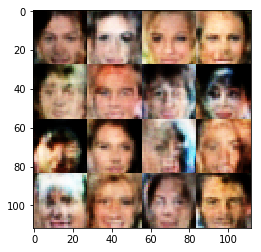

Epoch 1/1... Discriminator Loss: 0.3876 ... Generator Loss: 5.0833
Epoch 1/1... Discriminator Loss: 0.3944 ... Generator Loss: 4.7213
Epoch 1/1... Discriminator Loss: 0.3925 ... Generator Loss: 4.0291
Epoch 1/1... Discriminator Loss: 0.4973 ... Generator Loss: 2.6278
Epoch 1/1... Discriminator Loss: 0.3898 ... Generator Loss: 3.6656
Epoch 1/1... Discriminator Loss: 1.1738 ... Generator Loss: 4.0610
Epoch 1/1... Discriminator Loss: 0.4829 ... Generator Loss: 4.2202
Epoch 1/1... Discriminator Loss: 0.7767 ... Generator Loss: 2.5594
Epoch 1/1... Discriminator Loss: 0.5590 ... Generator Loss: 1.8547
Epoch 1/1... Discriminator Loss: 0.7511 ... Generator Loss: 1.2521


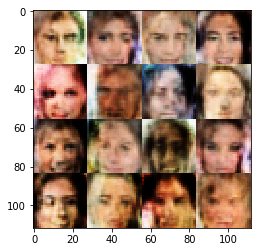

Epoch 1/1... Discriminator Loss: 0.5364 ... Generator Loss: 1.9402
Epoch 1/1... Discriminator Loss: 1.2339 ... Generator Loss: 5.1654
Epoch 1/1... Discriminator Loss: 0.5053 ... Generator Loss: 2.4245
Epoch 1/1... Discriminator Loss: 0.6208 ... Generator Loss: 2.2231
Epoch 1/1... Discriminator Loss: 0.4185 ... Generator Loss: 3.5268
Epoch 1/1... Discriminator Loss: 0.6800 ... Generator Loss: 1.4787
Epoch 1/1... Discriminator Loss: 0.9112 ... Generator Loss: 4.6428
Epoch 1/1... Discriminator Loss: 0.7558 ... Generator Loss: 3.6068
Epoch 1/1... Discriminator Loss: 0.5000 ... Generator Loss: 2.1709
Epoch 1/1... Discriminator Loss: 0.4343 ... Generator Loss: 3.1648


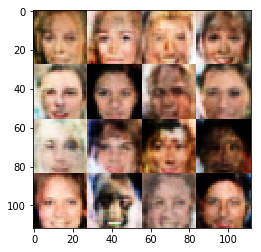

Epoch 1/1... Discriminator Loss: 0.7467 ... Generator Loss: 4.4385
Epoch 1/1... Discriminator Loss: 0.5428 ... Generator Loss: 2.4242
Epoch 1/1... Discriminator Loss: 0.7657 ... Generator Loss: 1.2653
Epoch 1/1... Discriminator Loss: 0.4428 ... Generator Loss: 4.4930
Epoch 1/1... Discriminator Loss: 0.6208 ... Generator Loss: 1.5863
Epoch 1/1... Discriminator Loss: 0.4758 ... Generator Loss: 4.4356
Epoch 1/1... Discriminator Loss: 0.3808 ... Generator Loss: 3.8852
Epoch 1/1... Discriminator Loss: 0.3743 ... Generator Loss: 4.2432
Epoch 1/1... Discriminator Loss: 0.4269 ... Generator Loss: 2.8509
Epoch 1/1... Discriminator Loss: 0.5830 ... Generator Loss: 1.7482


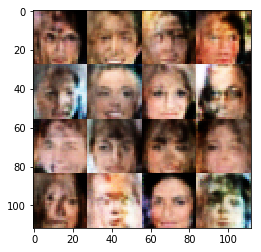

Epoch 1/1... Discriminator Loss: 0.5392 ... Generator Loss: 2.0460
Epoch 1/1... Discriminator Loss: 0.4658 ... Generator Loss: 2.8398
Epoch 1/1... Discriminator Loss: 0.6000 ... Generator Loss: 5.2710
Epoch 1/1... Discriminator Loss: 0.7012 ... Generator Loss: 2.9005
Epoch 1/1... Discriminator Loss: 1.0583 ... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 0.4658 ... Generator Loss: 3.6480
Epoch 1/1... Discriminator Loss: 0.6048 ... Generator Loss: 1.7139
Epoch 1/1... Discriminator Loss: 0.3989 ... Generator Loss: 3.2950
Epoch 1/1... Discriminator Loss: 0.5906 ... Generator Loss: 1.7699
Epoch 1/1... Discriminator Loss: 0.5460 ... Generator Loss: 2.0287


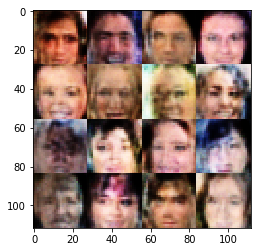

Epoch 1/1... Discriminator Loss: 0.6808 ... Generator Loss: 3.3206
Epoch 1/1... Discriminator Loss: 1.7399 ... Generator Loss: 0.3348
Epoch 1/1... Discriminator Loss: 1.6641 ... Generator Loss: 0.3719
Epoch 1/1... Discriminator Loss: 0.6820 ... Generator Loss: 1.8326
Epoch 1/1... Discriminator Loss: 0.5343 ... Generator Loss: 2.0970
Epoch 1/1... Discriminator Loss: 0.4656 ... Generator Loss: 2.5093
Epoch 1/1... Discriminator Loss: 0.4902 ... Generator Loss: 3.2507
Epoch 1/1... Discriminator Loss: 0.3786 ... Generator Loss: 3.9242
Epoch 1/1... Discriminator Loss: 0.4837 ... Generator Loss: 3.1711
Epoch 1/1... Discriminator Loss: 0.6319 ... Generator Loss: 1.6070


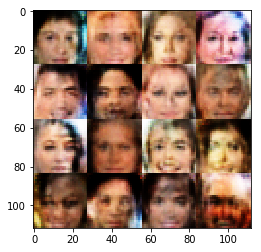

Epoch 1/1... Discriminator Loss: 1.8390 ... Generator Loss: 0.3403
Epoch 1/1... Discriminator Loss: 0.5494 ... Generator Loss: 3.8933
Epoch 1/1... Discriminator Loss: 0.7254 ... Generator Loss: 1.3247
Epoch 1/1... Discriminator Loss: 0.4341 ... Generator Loss: 3.9092
Epoch 1/1... Discriminator Loss: 0.7169 ... Generator Loss: 5.3991
Epoch 1/1... Discriminator Loss: 0.4218 ... Generator Loss: 3.3335
Epoch 1/1... Discriminator Loss: 0.4914 ... Generator Loss: 2.5613
Epoch 1/1... Discriminator Loss: 0.4291 ... Generator Loss: 3.0988
Epoch 1/1... Discriminator Loss: 0.4658 ... Generator Loss: 2.8969
Epoch 1/1... Discriminator Loss: 1.8302 ... Generator Loss: 3.0270


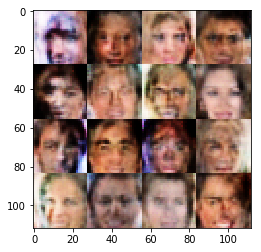

Epoch 1/1... Discriminator Loss: 0.4433 ... Generator Loss: 3.3602
Epoch 1/1... Discriminator Loss: 0.4200 ... Generator Loss: 2.9926
Epoch 1/1... Discriminator Loss: 0.3945 ... Generator Loss: 3.4226
Epoch 1/1... Discriminator Loss: 0.4926 ... Generator Loss: 2.3015
Epoch 1/1... Discriminator Loss: 0.4092 ... Generator Loss: 5.2923
Epoch 1/1... Discriminator Loss: 0.5341 ... Generator Loss: 1.9725
Epoch 1/1... Discriminator Loss: 0.4372 ... Generator Loss: 2.9777
Epoch 1/1... Discriminator Loss: 0.3694 ... Generator Loss: 4.5215
Epoch 1/1... Discriminator Loss: 0.4486 ... Generator Loss: 3.1738
Epoch 1/1... Discriminator Loss: 0.5690 ... Generator Loss: 4.5028


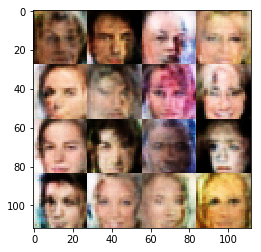

Epoch 1/1... Discriminator Loss: 0.8346 ... Generator Loss: 1.6931
Epoch 1/1... Discriminator Loss: 0.4351 ... Generator Loss: 3.9510
Epoch 1/1... Discriminator Loss: 0.4720 ... Generator Loss: 2.6338
Epoch 1/1... Discriminator Loss: 0.4820 ... Generator Loss: 2.4002
Epoch 1/1... Discriminator Loss: 0.5157 ... Generator Loss: 2.9333
Epoch 1/1... Discriminator Loss: 0.4028 ... Generator Loss: 3.2221


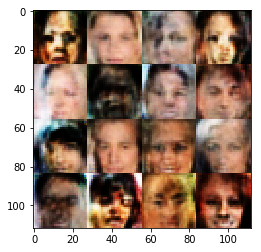

In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.